#### import beberapa library

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#### Task 1 : Merge 12 bulan laporan pejualan ke dalam 1 file

In [2]:
df = pd.read_csv("../Sales_Data/Sales_April_2019.csv")
df.head()

all_mount_datas = pd.DataFrame()

files = [file for file in os.listdir("../Sales_Data/")]
for file in files:
    df = pd.read_csv("../Sales_Data/"+file)
    all_mount_datas = pd.concat([all_mount_datas, df])
    
all_mount_datas.to_csv('all_data.csv', index=False)

#### Membaca file langsung hasil generate/merge diatas , yaitu all_data.csv

In [17]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### cleaning data  Menghapus semua row data yang memiliki value nan

In [18]:
all_data = all_data.dropna()
all_data[all_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### cleaning data Mencari dan menghapus data di kolom Order Date yang bernilai Or

In [19]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### cleaning data menambah kolom Datetime dengan value hasil convert string to datetime dari kolom Order Date

In [20]:
all_data["Datetime"] = pd.to_datetime(all_data["Order Date"])
all_data.head()

/tmp/ipykernel_1267/2147368424.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Datetime"] = pd.to_datetime(all_data["Order Date"])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Datetime
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00


#### cleaning data Mengubah tipe data kolom Quantity Ordered dan Price Each menjadi numeric

In [21]:
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"], errors='coerce')
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"], errors='coerce')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Datetime
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00


#### cleaning data menambahkan kolom jam, yang didapat dari kolom Datetime

In [22]:
all_data["Hour"] = all_data["Datetime"].dt.hour
all_data["Minute"] = all_data["Datetime"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Datetime,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,0,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,7,3
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,18,21
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,15,13
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,38


### Pertanyaan 1 : Bulan apa yang terbaik dalam penjualan, dan berapa jumlah pendapatan yang didapat dalam bulan itu ?

#### Menambahkan kolom bulan untuk masing2 row berdasarkan kolom Order_Date

In [37]:
all_data["mouth"] = all_data["Order Date"].str[0:2]
all_data["mouth"] = all_data["mouth"].astype("int") 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Datetime,Hour,Minute,mouth,mouth_float,total
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,0,1,12,2,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,7,3,12,2,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,18,21,12,2,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,15,13,12,2,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,38,12,2,11.95


#### Menambahkan kolom total dari hasil perkalian kolom Price Each dan Quantity Ordered

In [38]:
all_data["total"] = all_data["Price Each"] * all_data["Quantity Ordered"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Datetime,Hour,Minute,mouth,mouth_float,total
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,0,1,12,2,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,7,3,12,2,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,18,21,12,2,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,15,13,12,2,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,38,12,2,11.95


In [39]:
results = all_data[["total", "mouth"]].groupby("mouth").sum()

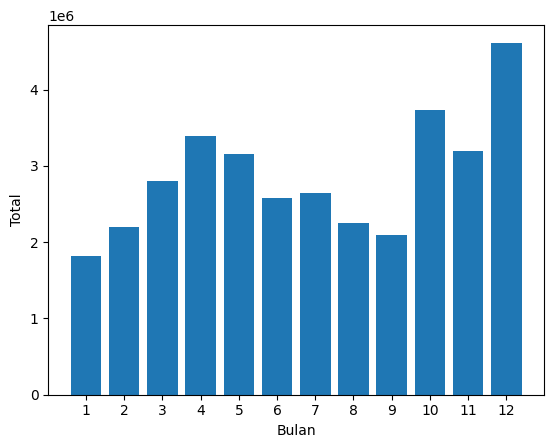

In [40]:
plt.bar(range(1, 13), results["total"])
plt.xticks(range(1, 13))
plt.ylabel("Total")
plt.xlabel("Bulan")
plt.show()

### Pertanyaan 2 : Kota apa yang memiliki pendapatan tertinggi

### Menambahkan kolom kota

In [41]:
def getCity(value):
    secondAddress = value.split(",")
    return secondAddress[1]
def getState(value):
    stateAddress = value.split(",")
    return stateAddress[2]
    
# all_data["City"] = all_data["Purchase Address"].apply(lambda x: getCity(x)+", "+getState(x))
all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{getCity(x)} ({getState(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Datetime,Hour,Minute,mouth,mouth_float,total,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,0,1,12,2,1700.00,New York City ( NY 10001)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,7,3,12,2,600.00,New York City ( NY 10001)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,18,21,12,2,11.95,New York City ( NY 10001)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,15,13,12,2,149.99,San Francisco ( CA 94016)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,38,12,2,11.95,Atlanta ( GA 30301)


In [42]:
results = all_data[["City", "total"]].groupby("City").sum()
results

,total
City,
Atlanta ( GA 30301),2795498.58
Austin ( TX 73301),1819581.75
Boston ( MA 02215),3661642.01
Dallas ( TX 75001),2767975.40
Los Angeles ( CA 90001),5452570.80
New York City ( NY 10001),4664317.43
Portland ( ME 04101),449758.27
Portland ( OR 97035),1870732.34
San Francisco ( CA 94016),8262203.91


[' New York City ( NY 10001)' ' San Francisco ( CA 94016)'
 ' Atlanta ( GA 30301)' ' Portland ( OR 97035)' ' Dallas ( TX 75001)'
 ' Los Angeles ( CA 90001)' ' Boston ( MA 02215)' ' Austin ( TX 73301)'
 ' Portland ( ME 04101)' ' Seattle ( WA 98101)']
[' Atlanta ( GA 30301)', ' Austin ( TX 73301)', ' Boston ( MA 02215)', ' Dallas ( TX 75001)', ' Los Angeles ( CA 90001)', ' New York City ( NY 10001)', ' Portland ( ME 04101)', ' Portland ( OR 97035)', ' San Francisco ( CA 94016)', ' Seattle ( WA 98101)']


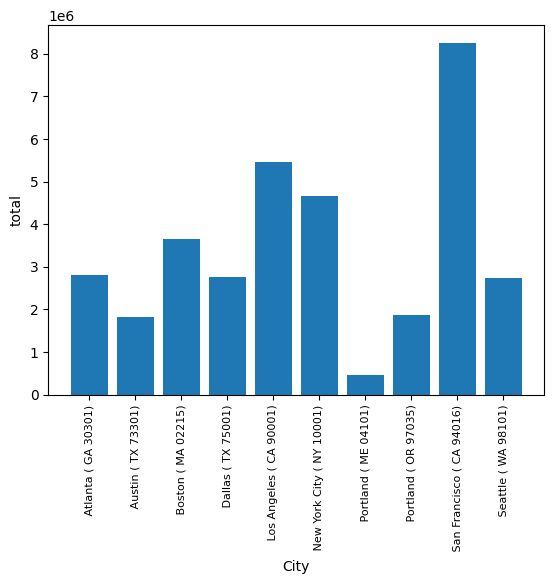

In [43]:
# cities = all_data["City"].unique()
# cities = [city for city, df in all_data.groupby("City").sum()]
cities = all_data["City"].unique()
print(cities)
cities = [city for city, df in all_data.groupby("City")]
print(cities)
plt.bar(cities, results["total"]);
plt.xticks(cities, rotation="vertical", size=8)
plt.ylabel("total")
plt.xlabel("City")
plt.show()

### Pertanyaan 3 : Kapan waktu yang tepat untuk memasarkan iklan sehingga mendapatkan pembelian maximum dari pembeli ?

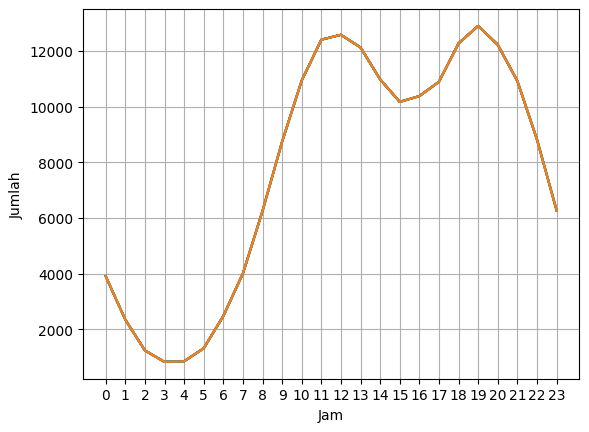

In [67]:
hours = [hour for hour, df in all_data.groupby("Hour")]
# print(hours)
# print(all_data.groupby("Hour").count())
plt.plot(hours, all_data.groupby("Hour").count())
plt.xticks(hours)
plt.xlabel("Jam")
plt.ylabel("Jumlah")
plt.grid()
plt.show()

### Pertanyaan 4 : Produk apa yang paling laku terjual ?

In [68]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head()


/tmp/ipykernel_1267/463667662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


### Pertanyaan 5: Produk apa yang paling laris terjual ?

/tmp/ipykernel_1267/3896915415.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", size=8)


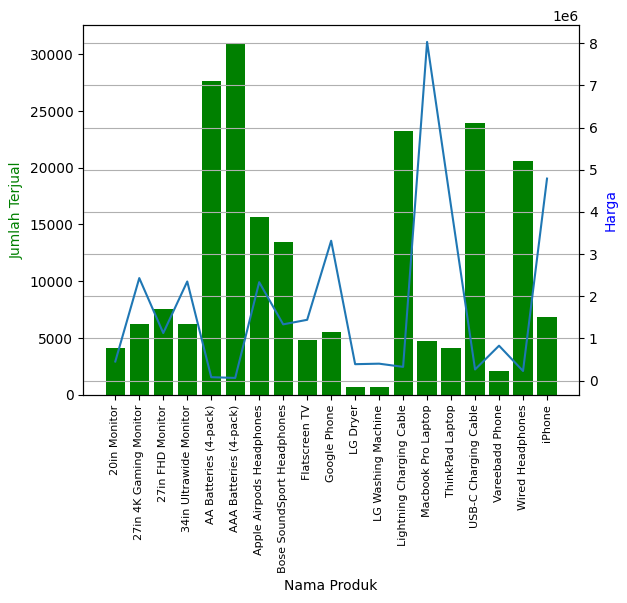

In [66]:
products_group = all_data.groupby("Product")
ordered_items = products_group[["Quantity Ordered"]].sum()["Quantity Ordered"]
products = [product for product, df in products_group]
prices = products_group[["Price Each"]].sum()["Price Each"]

flg, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, ordered_items, color="g")
ax2.plot(products, prices)

ax1.set_xticklabels(products, rotation="vertical", size=8)
ax1.set_xlabel("Nama Produk")
ax1.set_ylabel("Jumlah Terjual", color="g")
ax2.set_ylabel("Harga", color="b")

plt.grid()
plt.show()
